In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_test = pd.read_csv('/content/Test.csv')
df_train = pd.read_csv('/content/Train.csv')

In [ ]:
df=pd.concat([df_train,df_test],axis=0)
df

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
4995,This is the kind of picture John Lassiter woul...,1
4996,A MUST SEE! I saw WHIPPED at a press screening...,1
4997,NBC should be ashamed. I wouldn't allow my chi...,0
4998,This movie is a clumsy mishmash of various gho...,0


In [ ]:
df.isna().sum()

,0
text,0
label,0


<Axes: xlabel='label', ylabel='count'>

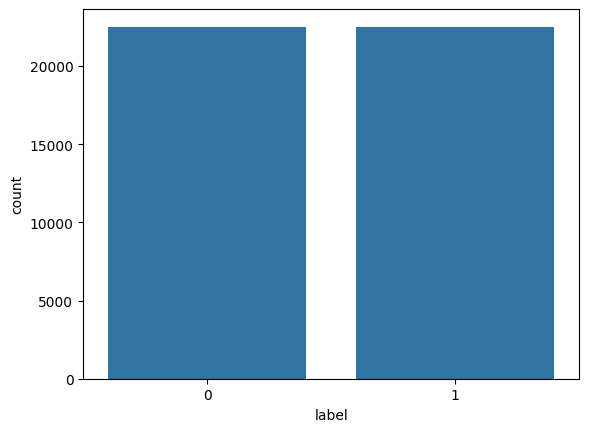

In [ ]:
sns.countplot(x='label',data=df)

In [ ]:
df.reset_index(drop=True,inplace=True)
df

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
44995,This is the kind of picture John Lassiter woul...,1
44996,A MUST SEE! I saw WHIPPED at a press screening...,1
44997,NBC should be ashamed. I wouldn't allow my chi...,0
44998,This movie is a clumsy mishmash of various gho...,0


In [ ]:
text=df.text
text

,text
0,I grew up (b. 1965) watching and loving the Th...
1,"When I put this movie in my DVD player, and sa..."
2,Why do people who do not know what a particula...
3,Even though I have great interest in Biblical ...
4,Im a die hard Dads Army fan and nothing will e...
...,...
44995,This is the kind of picture John Lassiter woul...
44996,A MUST SEE! I saw WHIPPED at a press screening...
44997,NBC should be ashamed. I wouldn't allow my chi...
44998,This movie is a clumsy mishmash of various gho...


In [ ]:
import nltk
from nltk.tokenize import TweetTokenizer
tk = TweetTokenizer()
text = text.apply(lambda x:tk.tokenize(x)).apply(lambda x:' '.join(x))
text

,text
0,I grew up ( b . 1965 ) watching and loving the...
1,"When I put this movie in my DVD player , and s..."
2,Why do people who do not know what a particula...
3,Even though I have great interest in Biblical ...
4,Im a die hard Dads Army fan and nothing will e...
...,...
44995,This is the kind of picture John Lassiter woul...
44996,A MUST SEE ! I saw WHIPPED at a press screenin...
44997,NBC should be ashamed . I wouldn't allow my ch...
44998,This movie is a clumsy mishmash of various gho...


In [ ]:
import re
text = text.str.replace('[^a-zA-Z0-9]',' ',regex=True)
text

,text
0,I grew up b 1965 watching and loving the...
1,When I put this movie in my DVD player and s...
2,Why do people who do not know what a particula...
3,Even though I have great interest in Biblical ...
4,Im a die hard Dads Army fan and nothing will e...
...,...
44995,This is the kind of picture John Lassiter woul...
44996,A MUST SEE I saw WHIPPED at a press screenin...
44997,NBC should be ashamed I wouldn t allow my ch...
44998,This movie is a clumsy mishmash of various gho...


In [ ]:
text = text.apply(lambda x:' '.join([w for w in tk.tokenize(x) if len(w)>=3]))
text

,text
0,grew 1965 watching and loving the Thunderbirds...
1,When put this movie DVD player and sat down wi...
2,Why people who not know what particular time t...
3,Even though have great interest Biblical movie...
4,die hard Dads Army fan and nothing will ever c...
...,...
44995,This the kind picture John Lassiter would maki...
44996,MUST SEE saw WHIPPED press screening and was h...
44997,NBC should ashamed wouldn allow children see t...
44998,This movie clumsy mishmash various ghost story...


In [ ]:
from nltk.stem import SnowballStemmer
ss = SnowballStemmer('english')
text = text.apply(lambda x:[ss.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
text

,text
0,grew 1965 watch and love the thunderbird all m...
1,when put this movi dvd player and sat down wit...
2,whi peopl who not know what particular time th...
3,even though have great interest biblic movi wa...
4,die hard dad armi fan and noth will ever chang...
...,...
44995,this the kind pictur john lassit would make to...
44996,must see saw whip press screen and was hilari ...
44997,nbc should asham wouldn allow children see thi...
44998,this movi clumsi mishmash various ghost stori ...


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
sp_data = stopwords.words('english')
text = text.apply(lambda x:[i for i in tk.tokenize(x) if i not in sp_data]).apply(lambda x:' '.join(x))
text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text
0,grew 1965 watch love thunderbird mate school w...
1,put movi dvd player sat coke chip expect hope ...
2,whi peopl know particular time past like feel ...
3,even though great interest biblic movi bore de...
4,die hard dad armi fan noth ever chang got tape...
...,...
44995,kind pictur john lassit would make today advan...
44996,must see saw whip press screen hilari talk non...
44997,nbc asham allow children see definit would tel...
44998,movi clumsi mishmash various ghost stori suspe...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer()
data = vector.fit_transform(text)
data

<45000x66112 sparse matrix of type '<class 'numpy.float64'>'
	with 4234198 stored elements in Compressed Sparse Row format>

In [ ]:
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,y,test_size = .30,random_state=42)

In [ ]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


model1=KNeighborsClassifier()
model2=RandomForestClassifier()
model3=LogisticRegression()
model4=MultinomialNB()


lst=[model1,model2,model3,model4]

for i in lst:
  print('model started :',i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print('accuray story :',accuracy_score(y_test,y_pred))
  print('model_ended')
  print('-'*100)

model started : KNeighborsClassifier()
accuray story : 0.7721481481481481
model_ended
----------------------------------------------------------------------------------------------------
model started : RandomForestClassifier()
accuray story : 0.8544444444444445
model_ended
----------------------------------------------------------------------------------------------------
model started : LogisticRegression()
accuray story : 0.8943703703703704
model_ended
----------------------------------------------------------------------------------------------------
model started : MultinomialNB()
accuray story : 0.8612592592592593
model_ended
----------------------------------------------------------------------------------------------------


In [ ]:
result={'Algorithms':['MultinomialNB','SVC','Random Forest','LogisticRegression'],'Accuracy':[' 86.13 %',' 89.89 %',' 85.32 %','89.43 %']}
result_table=pd.DataFrame(data=result)
result_table

,Algorithms,Accuracy
0,MultinomialNB,86.13 %
1,SVC,89.89 %
2,Random Forest,85.32 %
3,LogisticRegression,89.43 %


In [ ]:
def preprocess_text(input_text):
    tokenized_text = tk.tokenize(input_text)
    cleaned_text = re.sub('[^a-zA-Z0-9]', ' ', ' '.join(tokenized_text))
    filtered_text = ' '.join([word for word in tk.tokenize(cleaned_text) if len(word) >= 3])
    stemmed_text = ' '.join([ss.stem(word.lower()) for word in tk.tokenize(filtered_text)])
    final_text = ' '.join([word for word in tk.tokenize(stemmed_text) if word not in sp_data])
    return final_text

In [ ]:
input_text = "This film was a total letdown. The plot was confusing and the dialogue was cringe-worthy. I wouldn't recommend it to anyone."

processed_text = preprocess_text(input_text)
input_data = vector.transform([processed_text])
predicted_sentiment = model4.predict(input_data)

sentiment_label = {0: 'negative', 1: 'positive'}
predicted_sentiment_label = sentiment_label[predicted_sentiment[0]]

print(f"The predicted sentiment is: {predicted_sentiment_label}")

The predicted sentiment is: negative


In [ ]:
input_text = "What a fantastic experience! The visuals were stunning, and the soundtrack was beautiful. This movie is a must-see!"

processed_text = preprocess_text(input_text)
input_data = vector.transform([processed_text])
predicted_sentiment = model3.predict(input_data)

sentiment_label = {0: 'negative', 1: 'positive'}
predicted_sentiment_label = sentiment_label[predicted_sentiment[0]]

print(f"The predicted sentiment is: {predicted_sentiment_label}")

The predicted sentiment is: positive


In [ ]:
!pip install streamlit

In [ ]:
# After your model evaluation code

import joblib

# Save the trained model (e.g., using the last model you trained, model4)
joblib.dump(model4, 'model4.pkl')

# Save the TF-IDF vectorizer
joblib.dump(vector, 'vector.pkl')


['vector.pkl']

In [ ]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.91.112:8501

  Stopping...
^C
